### 2021_11_01_3

### IRIS 데이터 셋을 이용한 PCA 실습

In [4]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

In [2]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis = 1)
y_iris = iris["species"]

print("X_iris shape : ", X_iris.shape)
print("y_iris shape : ", y_iris.shape)

X_iris shape :  (150, 4)
y_iris shape :  (150,)


In [3]:
model = PCA()
X_pca_dat = model.fit(X_iris).transform(X_iris)
print("X_pca_dat shape : ", X_pca_dat.shape)
print("X_pca_dat type : ", type(X_pca_dat))

X_pca_dat shape :  (150, 4)
X_pca_dat type :  <class 'numpy.ndarray'>


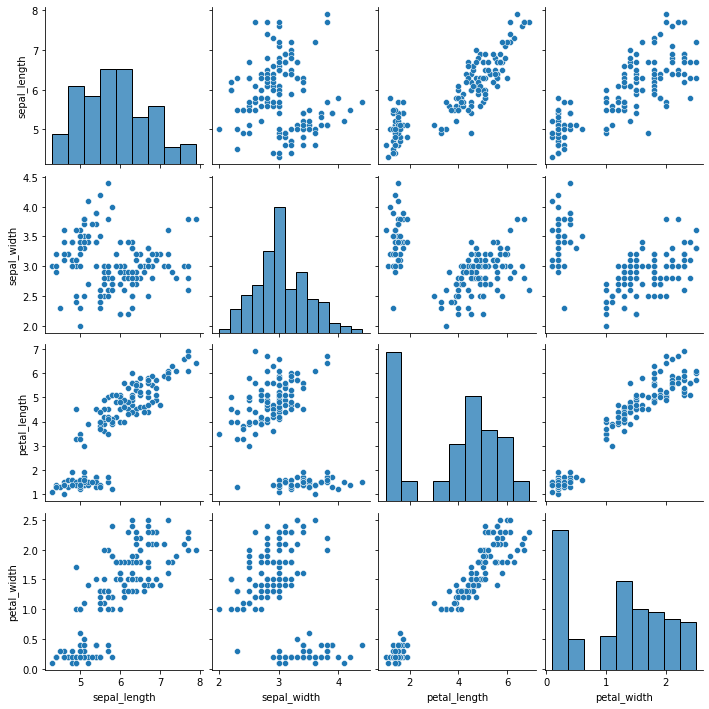

In [5]:
sns.pairplot(iris)

### 주성분을 데이터 프레임으로 변환 후, 시각화

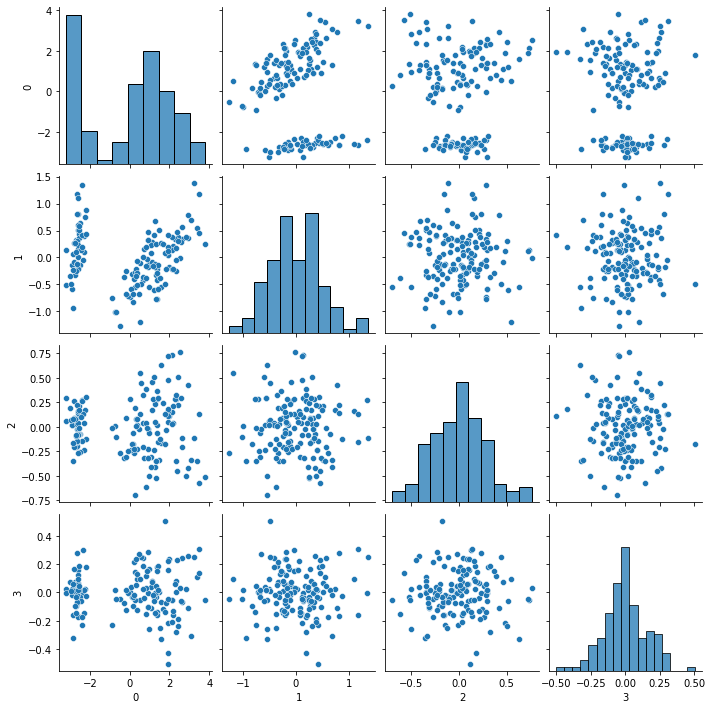

In [6]:
df = pd.DataFrame(X_pca_dat[0:,0:])
sns.pairplot(df)

* 상관관계가 낮은 그래프는 선 형태가 보이지 않고 데이터들이 퍼져있다.

In [7]:
df.corr()

,0,1,2,3
0,1.000000e+00,6.278254e-16,2.604416e-16,9.564521e-17
1,6.278254e-16,1.000000e+00,-4.124063e-16,-2.982056e-16
2,2.604416e-16,-4.124063e-16,1.000000e+00,3.883008e-17
3,9.564521e-17,-2.982056e-16,3.883008e-17,1.000000e+00


### 2개의 feature로 줄여보기
* n_components 사용

In [18]:
model = PCA(n_components = 2)
X_pca2 = model.fit_transform(X_iris)
print("X_pca_dat shape : ", X_pca2.shape)
print("X_pca_dat type : ", type(X_pca2))

X_pca_dat shape :  (150, 2)
X_pca_dat type :  <class 'numpy.ndarray'>


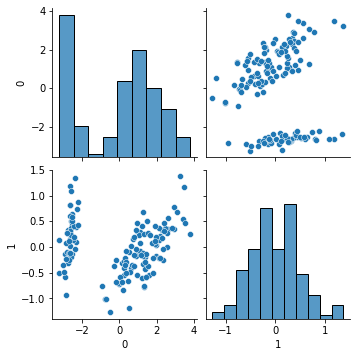

In [16]:
df = pd.DataFrame(X_pca2)
sns.pairplot(df)

In [17]:
df.corr()

,0,1
0,1.000000e+00,6.278254e-16
1,6.278254e-16,1.000000e+00


In [19]:
iris['PCA1'] = df.iloc[:,0]  # feature 생성
iris['PCA2'] = df.iloc[:,1]  # feature 생성
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


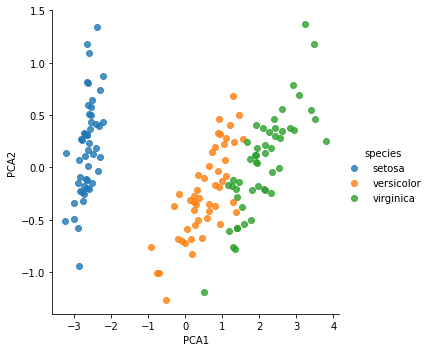

In [20]:
sns.lmplot('PCA1', 'PCA2', hue = "species", data = iris, 
           fit_reg = False)

* 붗꽃에 대한 기본 정보가 없음에도 PCA를 활용하여 2차원으로 표현한 내용이 잘 구분되어 있음을 볼 수 있다.

In [22]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'PCA1', 'PCA2'],
      dtype='object')

In [21]:
model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])